In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from pygam import GAM, s, l, f
from pygam import LinearGAM, s, l, f
from sklearn.metrics import mean_squared_error

In [2]:
demographic_data= pd.read_csv ('avg-household-size.csv')
health_data= pd.read_csv('cancer_reg.csv')

In [3]:
health_data.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap           binnedinc  medianage  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  pctprivatecoveragealone  pctempprivcoverage pctpubliccoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   pctpubliccoveragealone   pctwhite  pctblack  pctasian  pctotherrace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   pctmarriedhouseholds  birthrate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 33 columns]

### Understanding the Dataset

In [51]:
health_data.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [4]:
demographic_data.head()

statefips  countyfips  avghouseholdsize                           geography
0          2          13              2.43      Aleutians East Borough, Alaska
1          2          16              3.59  Aleutians West Census Area, Alaska
2          2          20              2.77      Anchorage Municipality, Alaska
3          2          50              3.86          Bethel Census Area, Alaska
4          2          60              2.50         Bristol Bay Borough, Alaska

In [5]:
merged_data = pd.merge(health_data, demographic_data, on='geography', how='inner')
merged_data.to_csv('merged_data.csv', index=False)
merged_data.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap           binnedinc  medianage  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  pctpubliccoveragealone   pctwhite  pctblack  pctasian  pctotherrace  \
0  ...                    14.0  81.780529  2.594728  4.821857      1.843479   
1  ...                    15.3  89.228509  0.969102  2.246233      3.741352   
2  ...                    21.1  90.922190  0.739673  0.465898      2.747358   
3  ...                    25.0  91.744686  0.782626  1.161359      1.362643   
4  ...                    22.7  94.104024  0.270192  0.665830      0.492135   

   pctmarriedhouseholds  birthrate  statefips  countyfips  avghouseholdsize  
0             52.856076   6.118831         53          35              2.54  
1             45.372500   4.333096         53          37              2.34  
2             54.444868   3.729488         53          39              2.62  
3             51.021514   4.603841         53          41              2.52  
4             54.027460   6.796657         53          43              2.34  

[5 rows x 36 columns]

In [6]:
health_data.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [6]:
merged_data.drop(columns = ['pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over'], inplace = True)

In [8]:
len(merged_data)

3047

In [9]:
print("Missing data in each column:\n", merged_data.isnull().sum())

Missing data in each column:
 avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
binnedinc                    0
medianage                    0
medianagemale                0
medianagefemale              0
geography                    0
percentmarried               0
pctemployed16_over         152
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone    609
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrate                    0
statefips                    0
countyfips                   0
avghouseholdsize             0
dtype: int64


In [7]:
# Filter the rows where 'pctprivatecoveragealone' is NaN
missing_coverage_data = merged_data[merged_data['pctprivatecoveragealone'].isnull()]

# Display the first 10 rows of this subset
missing_coverage_data.head(10)

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0        1397.0               469             164.9          489.8      61898   
9        4025.0              1380             177.8          510.9      60397   
10        113.0                36             121.4          413.3      54721   
11        740.0               269             172.7          499.3      51395   
23        499.0               215             206.1          463.1      56737   
32         45.0                21             209.9          463.1      32705   
37         68.0                29             153.0          374.9      41010   
46        373.0               144             188.8          510.9      43729   
49        418.0               184             210.0          493.8      35046   
54        105.0                52             209.7          425.4      44446   

    popest2015  povertypercent  studypercap           binnedinc  medianage  \
0       260131            11.2   499.748204   (61494.5, 125635]       39.3   
9       843954            13.1   427.748432  (54545.6, 61494.5]       35.8   
10       16252            12.7     0.000000  (54545.6, 61494.5]       54.4   
11      121846            15.7   837.122269  (51046.4, 54545.6]       41.0   
23      111901            13.2    89.364706  (54545.6, 61494.5]       38.4   
32        8518            28.9     0.000000    [22640, 34218.1]       38.4   
37       13852            15.3     0.000000  (40362.7, 42724.4]       44.5   
46       56925            17.9     0.000000    (42724.4, 45201]       41.1   
49       61164            20.5    81.747433  (34218.1, 37413.8]       42.3   
54       17524            13.0     0.000000    (42724.4, 45201]       46.1   

    ...  pctpubliccoveragealone   pctwhite   pctblack  pctasian  pctotherrace  \
0   ...                    14.0  81.780529   2.594728  4.821857      1.843479   
9   ...                    16.5  74.729668   6.710854  6.041472      2.699184   
10  ...                    18.3  92.573327   0.651792  1.428930      2.237403   
11  ...                    20.2  85.590273   0.806080  1.887836      6.226591   
23  ...                    17.3  87.801221   7.333247  1.052206      0.905964   
32  ...                    18.8  81.559463  10.897733  0.323924      1.353540   
37  ...                    19.1  94.690011   4.355626  0.466418      0.215270   
46  ...                    18.3  93.954922   3.622117  0.515936      0.000000   
49  ...                    27.1  91.142492   5.857071  0.654376      0.177732   
54  ...                    17.3  97.356223   0.772532  0.417740      0.000000   

    pctmarriedhouseholds  birthrate  statefips  countyfips  avghouseholdsize  
0              52.856076   6.118831         53          35              2.54  
9              50.063573   5.533430         53          53              2.65  
10             50.038921   4.586130         53          55              2.04  
11             52.937327   5.818153         53          57              2.56  
23             51.523505   4.872468         54           3              2.63  
32             52.587464   2.328431         54          21              2.40  
37             51.415826   2.955003         54          31              2.69  
46             49.463992   5.113460         54          49              2.47  
49             48.371380   4.807972         54          55              2.39  
54             45.141535   4.090036         54          65              2.36  

[10 rows x 30 columns]

In [8]:
# Calculate the mean employment rate and private coverage alone for each state
state_averages = merged_data.groupby('statefips').agg({
    'pctemployed16_over': 'mean',
    'pctprivatecoveragealone': 'mean'
}).reset_index()

# Rename columns for clarity
state_averages.rename(columns={
    'pctemployed16_over': 'mean_employment_rate',
    'pctprivatecoveragealone': 'mean_private_coverage'
}, inplace=True)

# Merge the state averages back to the main DataFrame
merged_data = pd.merge(merged_data, state_averages, on='statefips')

# Calculate the expected private coverage based on the employment rate for each row
merged_data['expected_private_coverage'] = (merged_data['pctemployed16_over'] / merged_data['mean_employment_rate']) * merged_data['mean_private_coverage']

# Impute missing 'pctprivatecoveragealone' using the 'expected_private_coverage'
merged_data.loc[merged_data['pctprivatecoveragealone'].isnull(), 'pctprivatecoveragealone'] = merged_data['expected_private_coverage']

# Check if there are any remaining missing values in 'pctprivatecoveragealone'
print(merged_data['pctprivatecoveragealone'].isnull().sum())

46


In [9]:
# Recalculate the mean employment rate for each state excluding missing values
state_employment_averages = merged_data.groupby('statefips')['pctemployed16_over'].mean().reset_index()
state_employment_averages.rename(columns={'pctemployed16_over': 'mean_employment_rate'}, inplace=True)

# Ensure the renaming took place (debug print)
print(state_employment_averages.head())

   statefips  mean_employment_rate
0          1             47.921667
1          2             60.681250
2          4             45.366667
3          5             49.246479
4          6             52.069091


In [10]:
# Merge the state averages back into the main DataFrame correctly
merged_data = pd.merge(merged_data, state_employment_averages, on='statefips', how='left')

# Check if the new columns are in merged_data (optional debug print)
merged_data.columns


Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate',
       'statefips', 'countyfips', 'avghouseholdsize', 'mean_employment_rate_x',
       'mean_private_coverage', 'expected_private_coverage',
       'mean_employment_rate_y'],
      dtype='object')

In [11]:
# Fill missing 'pctemployed16_over' with 'mean_employment_rate'
merged_data.loc[merged_data['pctemployed16_over'].isnull(), 'pctemployed16_over'] = merged_data['mean_employment_rate_x']

# Check if filling was successful (optional debug print)
print(merged_data['pctemployed16_over'].isnull().sum())

0


In [12]:
# Update state means including the newly imputed 'pctemployed16_over'
updated_state_averages = merged_data.groupby('statefips').agg({
    'pctemployed16_over': 'mean',
    'pctprivatecoveragealone': 'mean'
}).reset_index()
updated_state_averages.rename(columns={
    'pctemployed16_over': 'updated_mean_employment_rate',
    'pctprivatecoveragealone': 'updated_mean_private_coverage'
}, inplace=True)

# Merge updated averages
merged_data = pd.merge(merged_data, updated_state_averages, on='statefips', how='left')

# Calculate updated expected private coverage and impute
merged_data['updated_expected_private_coverage'] = (merged_data['pctemployed16_over'] / merged_data['updated_mean_employment_rate']) * merged_data['updated_mean_private_coverage']
merged_data.loc[merged_data['pctprivatecoveragealone'].isnull(), 'pctprivatecoveragealone'] = merged_data['updated_expected_private_coverage']

# Final check for missing values
print("Remaining missing 'pctprivatecoveragealone':", merged_data['pctprivatecoveragealone'].isnull().sum())

Remaining missing 'pctprivatecoveragealone': 0


In [16]:
merged_data.drop(['updated_mean_employment_rate',
       'updated_mean_private_coverage', 'updated_expected_private_coverage','mean_employment_rate_y', 'mean_employment_rate_x'], axis=1, inplace=True)

In [17]:
merged_data.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate',
       'statefips', 'countyfips', 'avghouseholdsize', 'mean_private_coverage',
       'expected_private_coverage'],
      dtype='object')

In [13]:
merged_data.drop(columns = ['medianagemale', 'medianagefemale', 'binnedinc', 'target_deathrate', 'mean_private_coverage',
       'expected_private_coverage', 'pctmarriedhouseholds', 'pctunemployed16_over', 'avghouseholdsize', 'countyfips'], inplace = True)

In [19]:
merged_data.head()

avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
0       1397.0               469          489.8      61898      260131   
1        173.0                70          411.6      48127       43269   
2        102.0                50          349.7      49348       21026   
3        427.0               202          430.4      44243       75882   
4         57.0                26          350.1      49955       10321   

   povertypercent  studypercap  medianage                     geography  \
0            11.2   499.748204       39.3     Kitsap County, Washington   
1            18.6    23.111234       33.0   Kittitas County, Washington   
2            14.6    47.560164       45.0  Klickitat County, Washington   
3            17.1   342.637253       42.8      Lewis County, Washington   
4            12.5     0.000000       48.3    Lincoln County, Washington   

   percentmarried  ...  pctprivatecoveragealone  pctempprivcoverage  \
0            52.5  ...                45.509467                41.6   
1            44.5  ...                53.800000                43.6   
2            54.2  ...                43.500000                34.9   
3            52.7  ...                40.300000                35.0   
4            57.8  ...                43.900000                35.1   

   pctpubliccoverage  pctpubliccoveragealone   pctwhite  pctblack  pctasian  \
0               32.9                    14.0  81.780529  2.594728  4.821857   
1               31.1                    15.3  89.228509  0.969102  2.246233   
2               42.1                    21.1  90.922190  0.739673  0.465898   
3               45.3                    25.0  91.744686  0.782626  1.161359   
4               44.0                    22.7  94.104024  0.270192  0.665830   

   pctotherrace  birthrate  statefips  
0      1.843479   6.118831         53  
1      3.741352   4.333096         53  
2      2.747358   3.729488         53  
3      1.362643   4.603841         53  
4      0.492135   6.796657         53  

[5 rows x 22 columns]

In [14]:
data = merged_data.copy()
#data['death_rate_per_1000'] = data['avgdeathsperyear'] / data['popest2015'] * 1000
#data['death_rate_per_1000']

In [21]:

import pandas as pd

# Set to display all columns
pd.set_option('display.max_columns', None)


In [22]:
data.describe()

avganncount  avgdeathsperyear  incidencerate      medincome  \
count   3047.000000       3047.000000    3047.000000    3047.000000   
mean     606.338544        185.965868     448.268586   47063.281917   
std     1416.356223        504.134286      54.560733   12040.090836   
min        6.000000          3.000000     201.300000   22640.000000   
25%       76.000000         28.000000     420.300000   38882.500000   
50%      171.000000         61.000000     453.549422   45207.000000   
75%      518.000000        149.000000     480.850000   52492.000000   
max    38150.000000      14010.000000    1206.900000  125635.000000   

         popest2015  povertypercent  studypercap    medianage  percentmarried  \
count  3.047000e+03     3047.000000  3047.000000  3047.000000     3047.000000   
mean   1.026374e+05       16.878175   155.399415    45.272333       51.773679   
std    3.290592e+05        6.409087   529.628366    45.304480        6.896928   
min    8.270000e+02        3.200000     0.000000    22.300000       23.100000   
25%    1.168400e+04       12.150000     0.000000    37.700000       47.750000   
50%    2.664300e+04       15.900000     0.000000    41.000000       52.400000   
75%    6.867100e+04       20.400000    83.650776    44.000000       56.400000   
max    1.017029e+07       47.400000  9762.308998   624.000000       72.500000   

       pctemployed16_over  pctprivatecoverage  pctprivatecoveragealone  \
count         3047.000000         3047.000000              3047.000000   
mean            54.180035           64.354939                48.417355   
std              8.189591           10.647057                 9.750523   
min             17.600000           22.300000                15.700000   
25%             48.700000           57.200000                41.410704   
50%             54.500000           65.100000                48.700000   
75%             60.286364           72.100000                55.443581   
max             80.100000           92.300000                78.900000   

       pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone  \
count         3047.000000        3047.000000             3047.000000   
mean            41.196324          36.252642               19.240072   
std              9.447687           7.841741                6.113041   
min             13.500000          11.200000                2.600000   
25%             34.500000          30.900000               14.850000   
50%             41.100000          36.300000               18.800000   
75%             47.700000          41.550000               23.100000   
max             70.700000          65.100000               46.600000   

          pctwhite     pctblack     pctasian  pctotherrace    birthrate  \
count  3047.000000  3047.000000  3047.000000   3047.000000  3047.000000   
mean     83.645286     9.107978     1.253965      1.983523     5.640306   
std      16.380025    14.534538     2.610276      3.517710     1.985816   
min      10.199155     0.000000     0.000000      0.000000     0.000000   
25%      77.296180     0.620675     0.254199      0.295172     4.521419   
50%      90.059774     2.247576     0.549812      0.826185     5.381478   
75%      95.451693    10.509732     1.221037      2.177960     6.493677   
max     100.000000    85.947799    42.619425     41.930251    21.326165   

         statefips  
count  3047.000000  
mean     30.272071  
std      15.054873  
min       1.000000  
25%      19.000000  
50%      29.000000  
75%      45.000000  
max      56.000000

In [24]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome',
       'popest2015', 'povertypercent', 'studypercap', 'medianage', 'geography',
       'percentmarried', 'pctemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'birthrate', 'statefips'],
      dtype='object')

In [15]:
data.drop(columns = ['pctempprivcoverage'], inplace=True)

In [16]:
data.drop(data[data['medianage'] > 100].index, inplace=True)

In [17]:
data['deathrate_per_1000'] = data['avgdeathsperyear'] / data['popest2015'] * 1000

In [28]:
df_finall_sort = data.sort_values(by = "medianage" , ascending = False)
df_finall_sort[df_finall_sort['medianage'] > 100].count()

avganncount                0
avgdeathsperyear           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
medianage                  0
geography                  0
percentmarried             0
pctemployed16_over         0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
birthrate                  0
statefips                  0
deathrate_per_1000         0
dtype: int64

In [29]:
health_df = data[['avganncount', 'avgdeathsperyear', 'incidencerate', 'pctprivatecoveragealone', 'pctprivatecoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'studypercap', 'deathrate_per_1000']]

In [30]:
health_stats = health_df.describe()

latex_table1 = health_stats.to_latex()

print(latex_table1)

\begin{tabular}{lrrrrrrrrr}
\toprule
 & avganncount & avgdeathsperyear & incidencerate & pctprivatecoveragealone & pctprivatecoverage & pctpubliccoverage & pctpubliccoveragealone & studypercap & deathrate_per_1000 \\
\midrule
count & 3017.000000 & 3017.000000 & 3017.000000 & 3017.000000 & 3017.000000 & 3017.000000 & 3017.000000 & 3017.000000 & 3017.000000 \\
mean & 607.573376 & 186.285714 & 448.154402 & 48.412932 & 64.360093 & 36.257474 & 19.243818 & 156.586892 & 2.287055 \\
std & 1422.111040 & 506.346011 & 54.608081 & 9.741832 & 10.629592 & 7.843518 & 6.116668 & 532.071270 & 0.610817 \\
min & 6.000000 & 3.000000 & 201.300000 & 15.700000 & 22.300000 & 11.200000 & 2.600000 & 0.000000 & 0.485029 \\
25% & 76.000000 & 28.000000 & 420.300000 & 41.500000 & 57.200000 & 30.900000 & 14.800000 & 0.000000 & 1.887895 \\
50% & 170.000000 & 61.000000 & 453.549422 & 48.688755 & 65.100000 & 36.400000 & 18.800000 & 0.000000 & 2.290488 \\
75% & 515.000000 & 147.000000 & 480.800000 & 55.400000 & 72.10000

In [31]:
health_stats

avganncount  avgdeathsperyear  incidencerate  pctprivatecoveragealone  \
count   3017.000000       3017.000000    3017.000000              3017.000000   
mean     607.573376        186.285714     448.154402                48.412932   
std     1422.111040        506.346011      54.608081                 9.741832   
min        6.000000          3.000000     201.300000                15.700000   
25%       76.000000         28.000000     420.300000                41.500000   
50%      170.000000         61.000000     453.549422                48.688755   
75%      515.000000        147.000000     480.800000                55.400000   
max    38150.000000      14010.000000    1206.900000                78.900000   

       pctprivatecoverage  pctpubliccoverage  pctpubliccoveragealone  \
count         3017.000000        3017.000000             3017.000000   
mean            64.360093          36.257474               19.243818   
std             10.629592           7.843518                6.116668   
min             22.300000          11.200000                2.600000   
25%             57.200000          30.900000               14.800000   
50%             65.100000          36.400000               18.800000   
75%             72.100000          41.600000               23.100000   
max             92.300000          65.100000               46.600000   

       studypercap  deathrate_per_1000  
count  3017.000000         3017.000000  
mean    156.586892            2.287055  
std     532.071270            0.610817  
min       0.000000            0.485029  
25%       0.000000            1.887895  
50%       0.000000            2.290488  
75%      83.896902            2.683145  
max    9762.308998            5.136437

In [32]:
pop_df = data[['popest2015', 'povertypercent', 'medianage', 'percentmarried', 'pctemployed16_over', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'birthrate', 'medincome']]

pop_df.describe()

popest2015  povertypercent    medianage  percentmarried  \
count  3.017000e+03      3017.00000  3017.000000     3017.000000   
mean   1.027189e+05        16.88240    40.823865       51.777826   
std    3.302862e+05         6.41602     5.196933        6.906403   
min    8.270000e+02         3.20000    22.300000       23.100000   
25%    1.170300e+04        12.20000    37.700000       47.800000   
50%    2.658900e+04        15.80000    40.900000       52.400000   
75%    6.850200e+04        20.40000    43.800000       56.400000   
max    1.017029e+07        47.40000    65.300000       72.500000   

       pctemployed16_over     pctwhite     pctblack     pctasian  \
count         3017.000000  3017.000000  3017.000000  3017.000000   
mean            54.173729    83.673433     9.093275     1.255703   
std              8.197307    16.356226    14.550428     2.615716   
min             17.600000    10.199155     0.000000     0.000000   
25%             48.700000    77.399902     0.620104     0.254509   
50%             54.500000    90.059774     2.238336     0.550631   
75%             60.272727    95.443269    10.420061     1.220816   
max             80.100000   100.000000    85.947799    42.619425   

       pctotherrace    birthrate      medincome  
count   3017.000000  3017.000000    3017.000000  
mean       1.982160     5.639141   47060.539277  
std        3.524972     1.983919   12053.191812  
min        0.000000     0.000000   22640.000000  
25%        0.294923     4.524920   38887.000000  
50%        0.826185     5.380501   45207.000000  
75%        2.176268     6.491885   52476.000000  
max       41.930251    21.326165  125635.000000

In [19]:
data['clinical_trials'] = data['studypercap'].apply(lambda x: 'yes' if x > 0 else 'no')


In [34]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome',
       'popest2015', 'povertypercent', 'studypercap', 'medianage', 'geography',
       'percentmarried', 'pctemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'birthrate', 'statefips', 'deathrate_per_1000',
       'clinical_trials'],
      dtype='object')

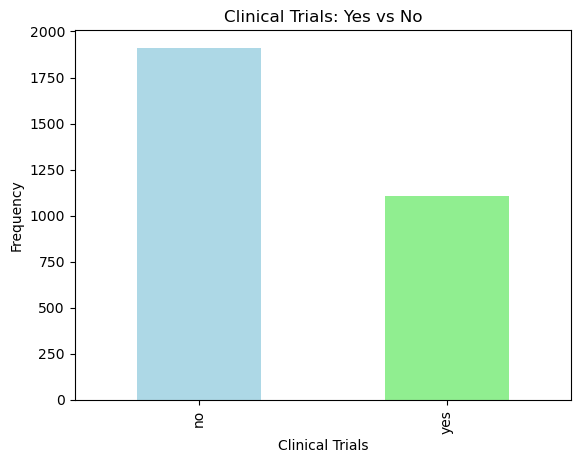

In [35]:
trial_counts = data['clinical_trials'].value_counts()

# Create a bar plot
trial_counts.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Clinical Trials: Yes vs No')
plt.xlabel('Clinical Trials')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=trial_counts.index)

# Show the plot
plt.show()

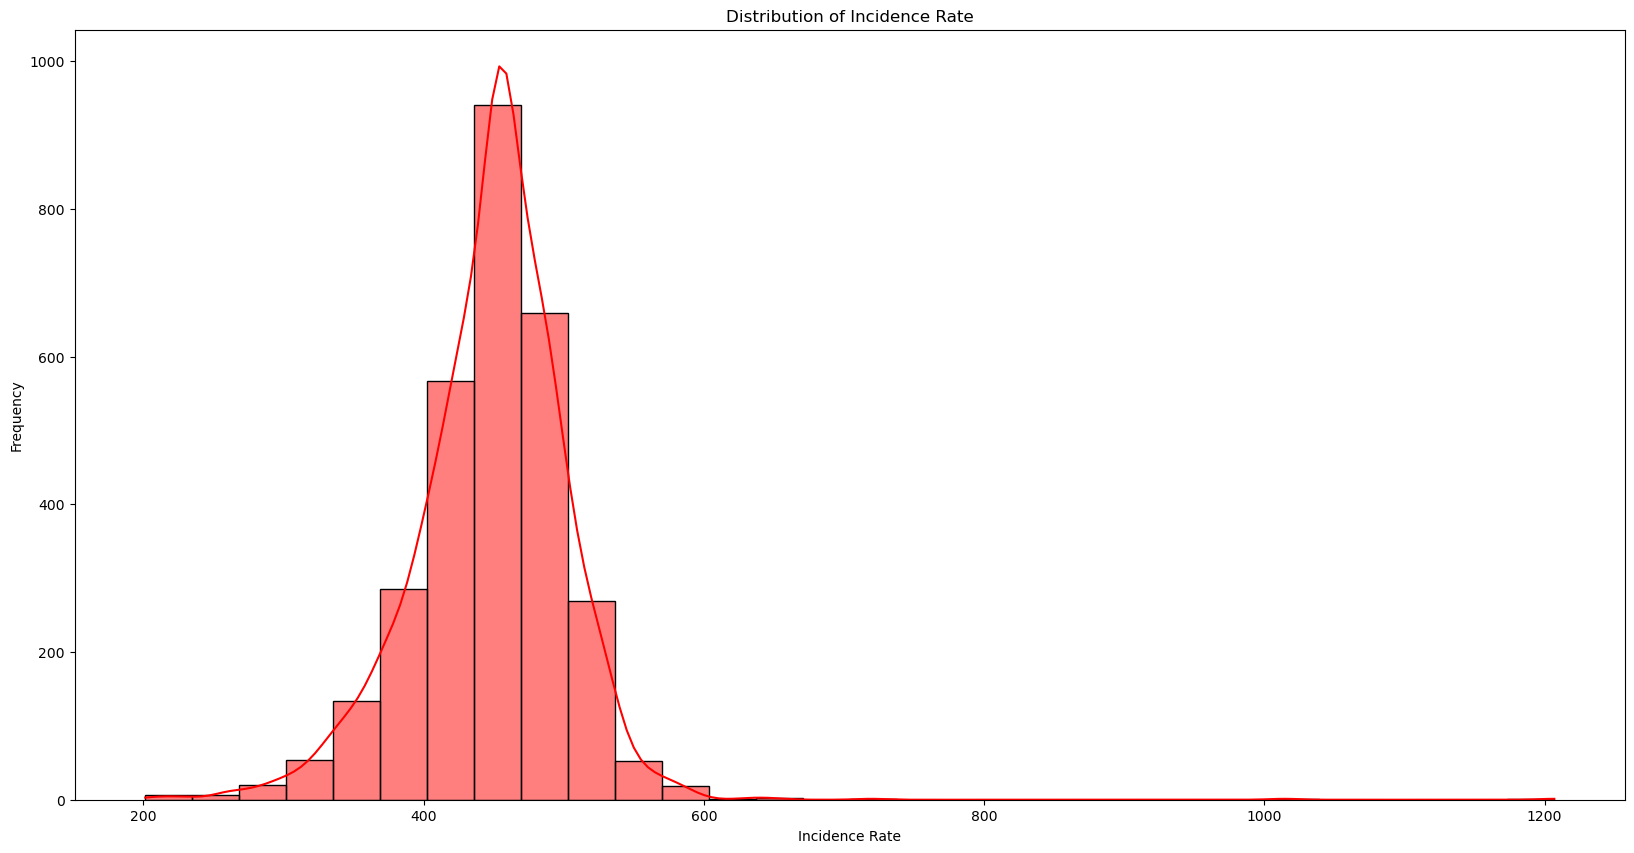

In [36]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x='incidencerate', bins=30, kde=True, color='red')
plt.title('Distribution of Incidence Rate')
plt.xlabel('Incidence Rate')
plt.ylabel('Frequency')
plt.show()

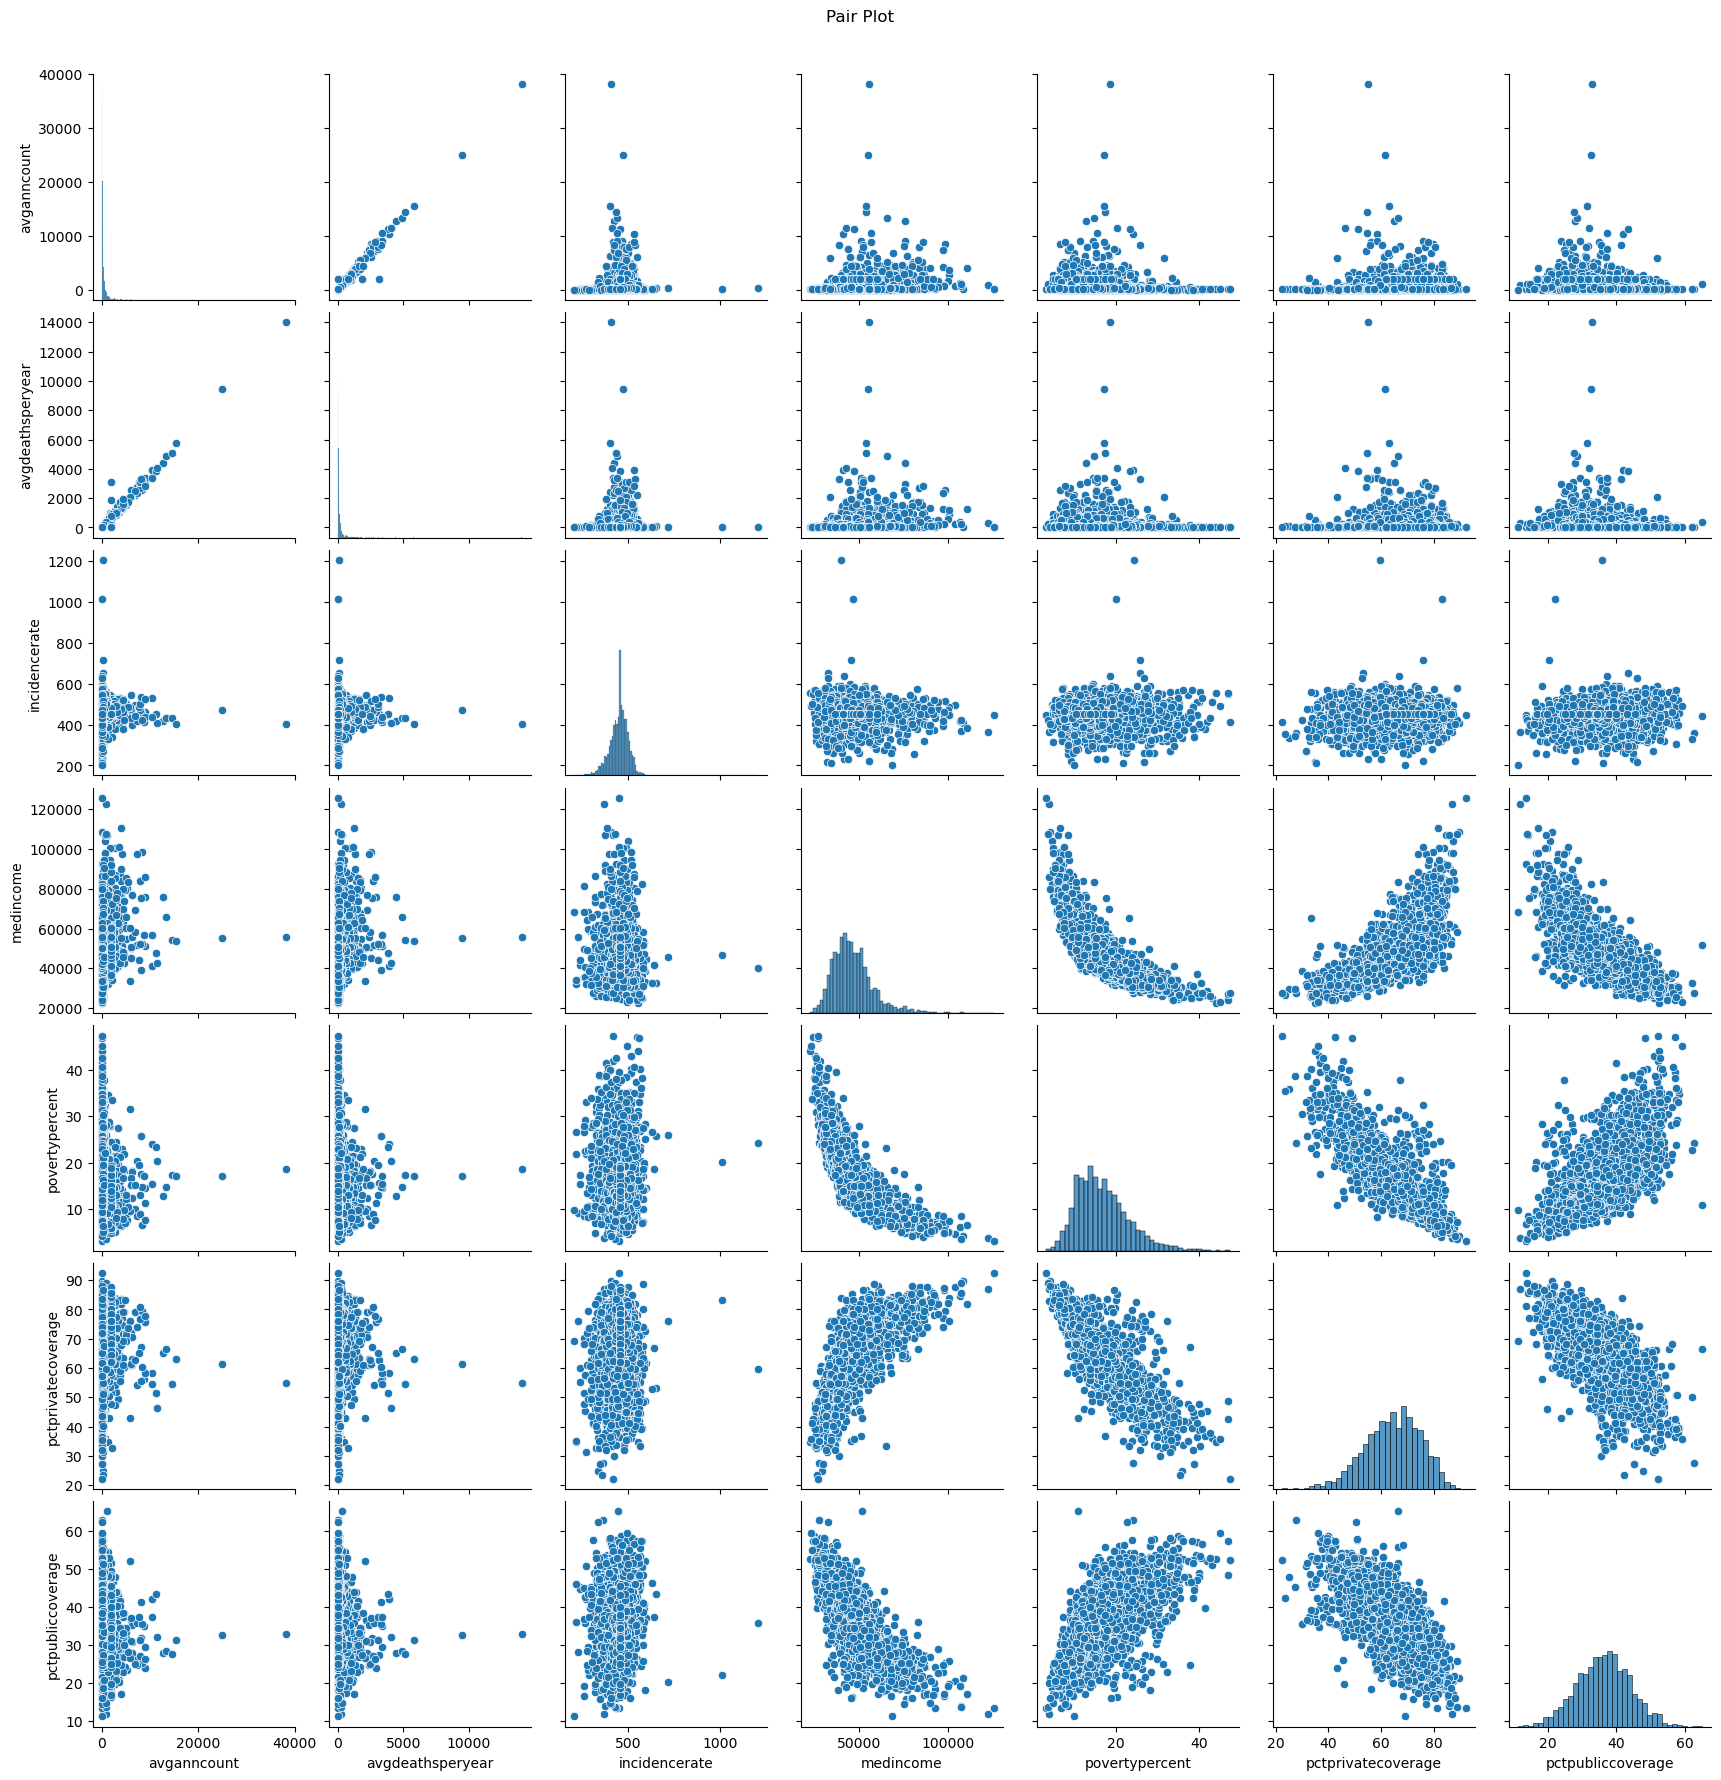

In [37]:
# Select a subset of relevant columns for pair plots
key_columns = [
     'avganncount', 'avgdeathsperyear',
    'incidencerate', 'medincome', 'povertypercent', 
    'pctprivatecoverage', 'pctpubliccoverage'
]

# Create the pair plot
sns.pairplot(data[key_columns])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

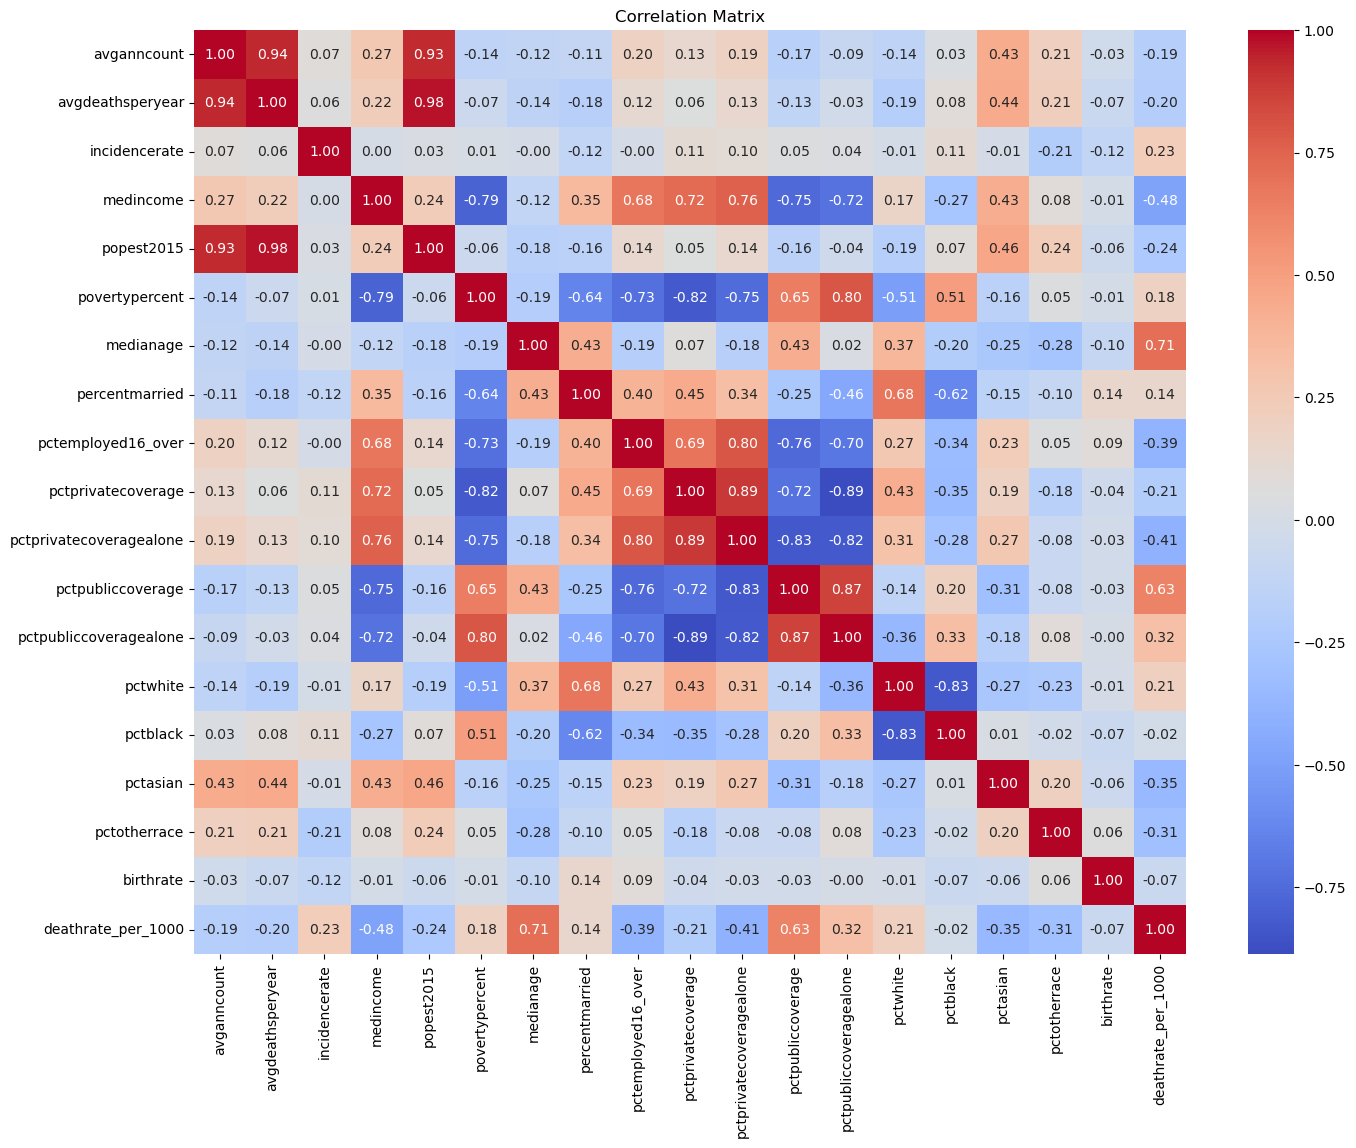

In [38]:
numeric_df_health=data.select_dtypes(include=['float64','int64'])
numeric_df_health = numeric_df_health.drop(columns = ['statefips', 'studypercap'])
corr_matrix = numeric_df_health.corr()


# Plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
data.head()

avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
0       1397.0               469          489.8      61898      260131   
1        173.0                70          411.6      48127       43269   
2        102.0                50          349.7      49348       21026   
3        427.0               202          430.4      44243       75882   
4         57.0                26          350.1      49955       10321   

   povertypercent  studypercap  medianage                     geography  \
0            11.2   499.748204       39.3     Kitsap County, Washington   
1            18.6    23.111234       33.0   Kittitas County, Washington   
2            14.6    47.560164       45.0  Klickitat County, Washington   
3            17.1   342.637253       42.8      Lewis County, Washington   
4            12.5     0.000000       48.3    Lincoln County, Washington   

   percentmarried  pctemployed16_over  pctprivatecoverage  \
0            52.5                51.9                75.1   
1            44.5                55.9                70.2   
2            54.2                45.9                63.7   
3            52.7                48.3                58.4   
4            57.8                48.2                61.6   

   pctprivatecoveragealone  pctpubliccoverage  pctpubliccoveragealone  \
0                45.509467               32.9                    14.0   
1                53.800000               31.1                    15.3   
2                43.500000               42.1                    21.1   
3                40.300000               45.3                    25.0   
4                43.900000               44.0                    22.7   

    pctwhite  pctblack  pctasian  pctotherrace  birthrate  statefips  \
0  81.780529  2.594728  4.821857      1.843479   6.118831         53   
1  89.228509  0.969102  2.246233      3.741352   4.333096         53   
2  90.922190  0.739673  0.465898      2.747358   3.729488         53   
3  91.744686  0.782626  1.161359      1.362643   4.603841         53   
4  94.104024  0.270192  0.665830      0.492135   6.796657         53   

   deathrate_per_1000 clinical_trials  
0            1.802938             yes  
1            1.617786             yes  
2            2.378008             yes  
3            2.662028             yes  
4            2.519136              no

In [40]:
age_groups = data.groupby('medianage')['deathrate_per_1000'].mean()

# Scatter plot
plt.scatter(data['medianage'], data['deathrate_per_1000'], color='blue', label='Death Rate')

# Line for average incidence rate
plt.plot(age_groups.index, age_groups.values, color='red', linestyle='--', label='Average Death Rate')

plt.title('Death Rate per 1000 by Age')
plt.xlabel('Age')
plt.ylabel('Death Rate per 1000')
plt.legend()

plt.show()

In [41]:
# Create box plot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot([data[data['clinical_trials'] == 'yes']['deathrate_per_1000'],
                       data[data['clinical_trials'] == 'no']['deathrate_per_1000']],
                      labels=['Yes', 'No'], patch_artist=True)

# Customize the plot
plt.title('Death Rate per 1000 by Clinical Trials conducted')
plt.xlabel('Clinical Trials conducted')
plt.ylabel('Death Rate per 1000')

# Show the plot
plt.show()

/var/folders/3d/q4w8688x57bb9666k54mhnxc0000gn/T/ipykernel_45327/3404993474.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot([data[data['clinical_trials'] == 'yes']['deathrate_per_1000'],


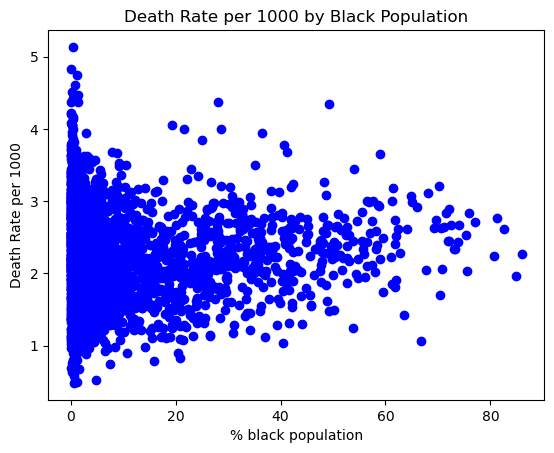

In [42]:
plt.scatter(data['pctblack'], data['deathrate_per_1000'], color='blue', label='Death Rate')

# Customize the plot
plt.title('Death Rate per 1000 by Black Population')
plt.xlabel('% black population')
plt.ylabel('Death Rate per 1000')

# Show the plot
plt.show()

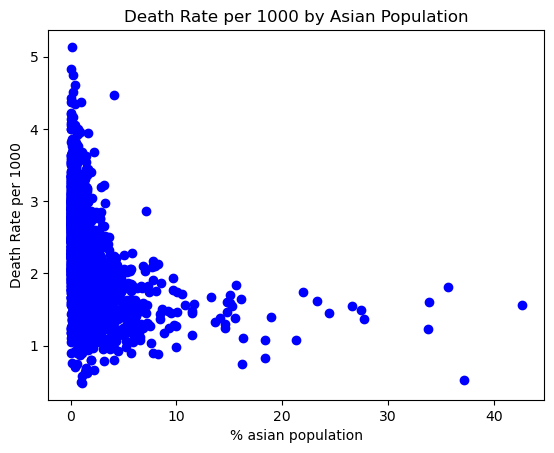

In [43]:
plt.scatter(data['pctasian'], data['deathrate_per_1000'], color='blue', label='Death Rate')

# Customize the plot
plt.title('Death Rate per 1000 by Asian Population')
plt.xlabel('% asian population')
plt.ylabel('Death Rate per 1000')

# Show the plot
plt.show()

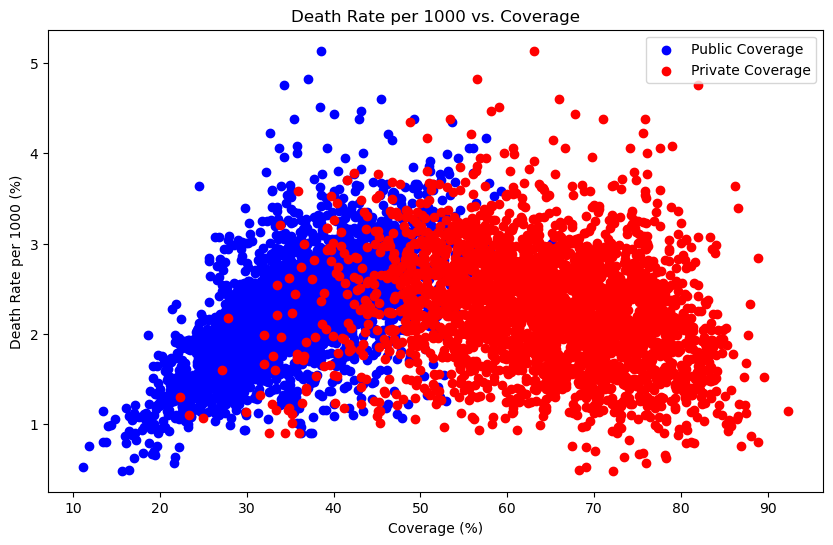

In [44]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['pctpubliccoverage'], data['deathrate_per_1000'], color='blue', label='Public Coverage')
plt.scatter(data['pctprivatecoverage'], data['deathrate_per_1000'], color='red', label='Private Coverage')

# Customize the plot
plt.title('Death Rate per 1000 vs. Coverage')
plt.xlabel('Coverage (%)')
plt.ylabel('Death Rate per 1000 (%)')
plt.legend()

# Show the plot
plt.show()

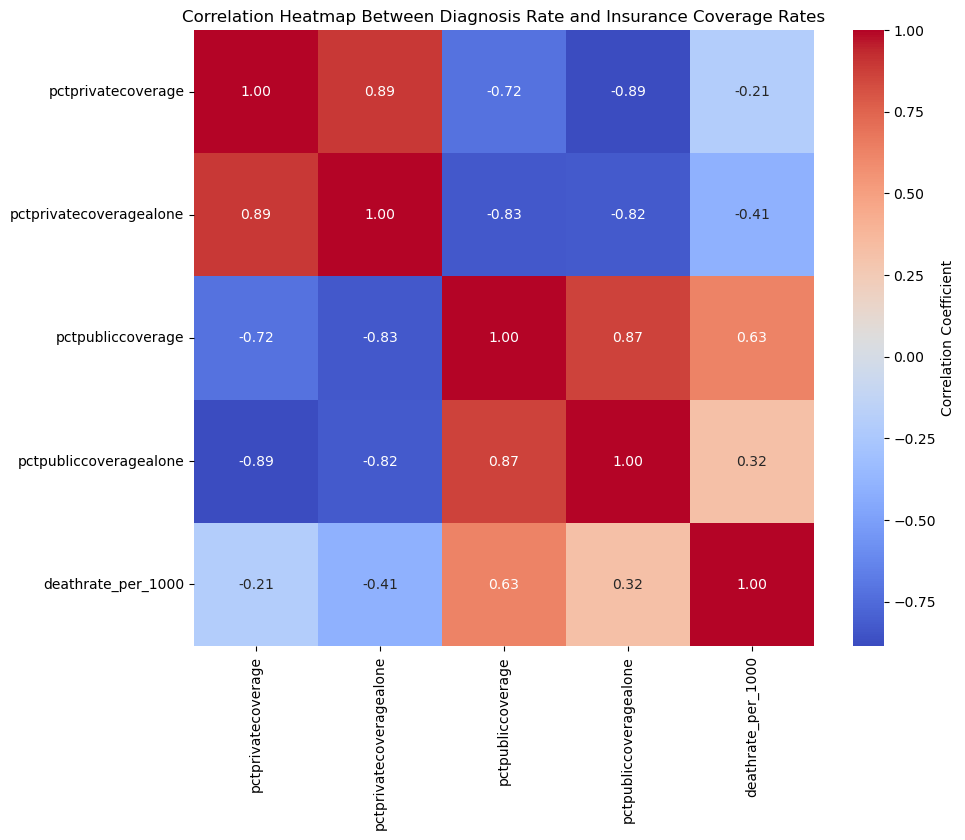

In [45]:
# List of insurance coverage rates you want to correlate with diagnosis_rate_per_1000
insurance_features = [
    'pctprivatecoverage',
    'pctprivatecoveragealone',
    'pctpubliccoverage',
    'pctpubliccoveragealone'
]

# Add 'diagnosis_rate_per_1000' to the list for correlation calculation
features_to_correlate = insurance_features + ['deathrate_per_1000']

# Calculate the correlation matrix for the selected features
correlation_matrix = data[features_to_correlate].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap Between Diagnosis Rate and Insurance Coverage Rates')
plt.show()

In [46]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome',
       'popest2015', 'povertypercent', 'studypercap', 'medianage', 'geography',
       'percentmarried', 'pctemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'birthrate', 'statefips', 'deathrate_per_1000',
       'clinical_trials'],
      dtype='object')

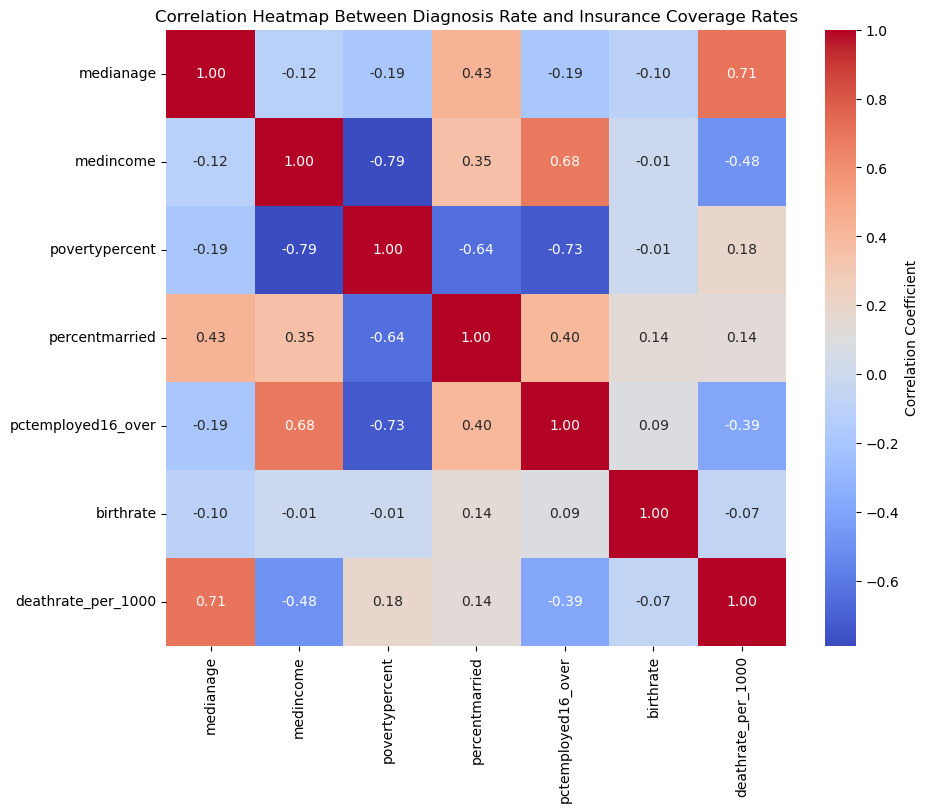

In [47]:
# List of insurance coverage rates you want to correlate with diagnosis_rate_per_1000
pop_features = [
    'medianage', 'medincome', 'povertypercent', 'percentmarried', 'pctemployed16_over', 'birthrate'
]

# Add 'diagnosis_rate_per_1000' to the list for correlation calculation
features_to_correlate1 = pop_features + ['deathrate_per_1000']

# Calculate the correlation matrix for the selected features
correlation_matrix1 = data[features_to_correlate1].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap Between Diagnosis Rate and Insurance Coverage Rates')
plt.show()

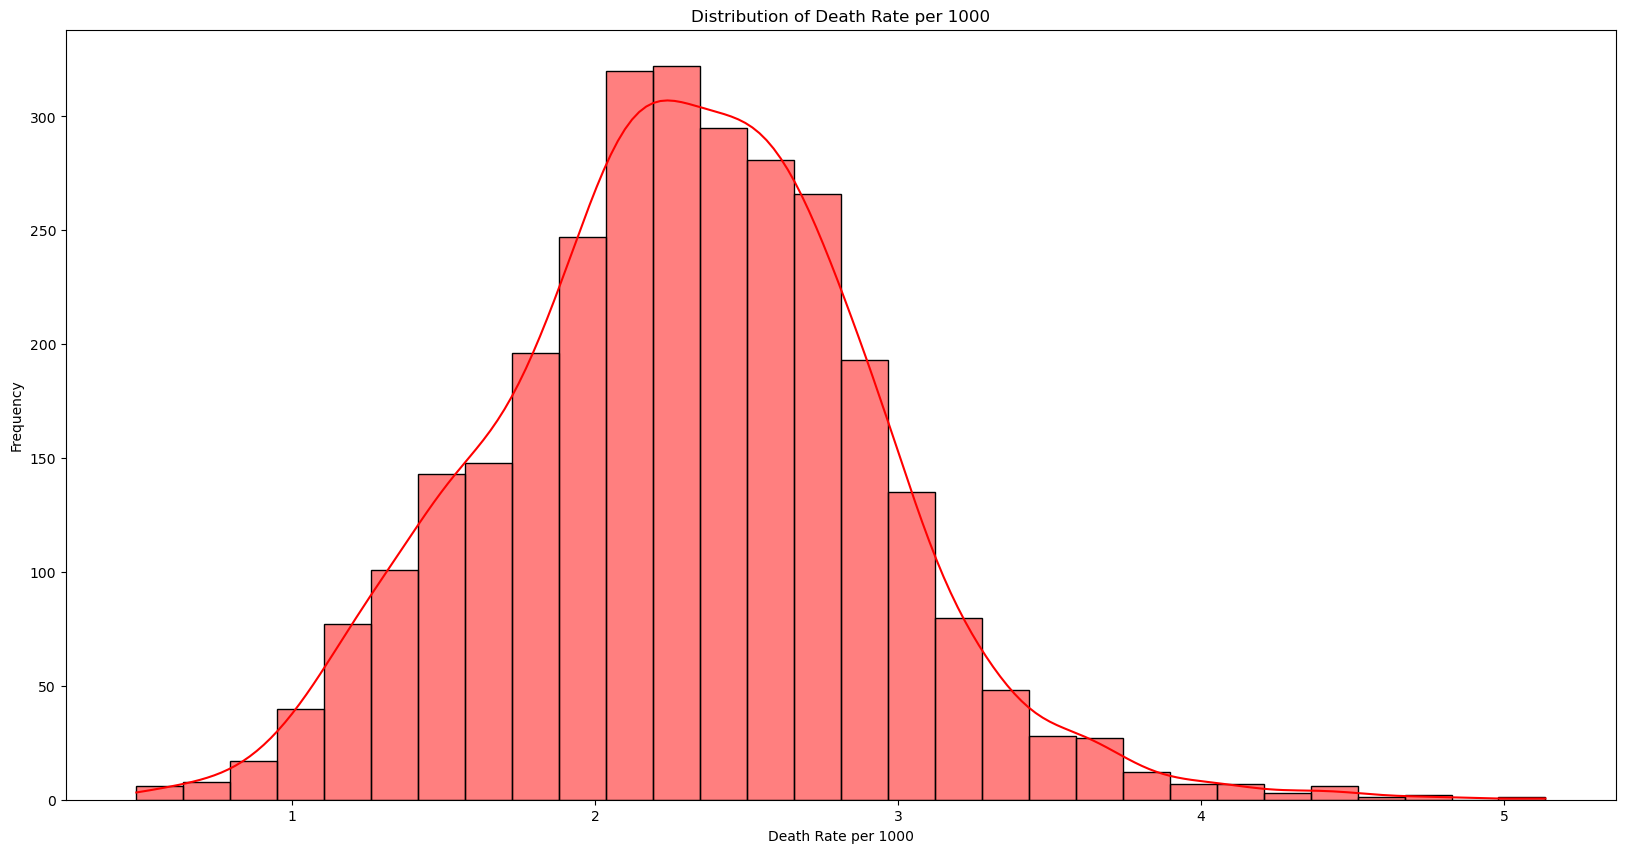

In [48]:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x='deathrate_per_1000', bins=30, kde=True, color='red')
plt.title('Distribution of Death Rate per 1000')
plt.xlabel('Death Rate per 1000')
plt.ylabel('Frequency')
plt.show()

In [49]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome',
       'popest2015', 'povertypercent', 'studypercap', 'medianage', 'geography',
       'percentmarried', 'pctemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'birthrate', 'statefips', 'deathrate_per_1000',
       'clinical_trials'],
      dtype='object')

## Selected Variables

In [53]:
select_data = data[['medincome', 'clinical_trials', 'medianage', 'pctprivatecoverage', 'pctpubliccoverage', 'pctemployed16_over', 'deathrate_per_1000']]

In [54]:
select_data.describe()

medincome    medianage  pctprivatecoverage  pctpubliccoverage  \
count    3017.000000  3017.000000         3017.000000        3017.000000   
mean    47060.539277    40.823865           64.360093          36.257474   
std     12053.191812     5.196933           10.629592           7.843518   
min     22640.000000    22.300000           22.300000          11.200000   
25%     38887.000000    37.700000           57.200000          30.900000   
50%     45207.000000    40.900000           65.100000          36.400000   
75%     52476.000000    43.800000           72.100000          41.600000   
max    125635.000000    65.300000           92.300000          65.100000   

       pctemployed16_over  deathrate_per_1000  
count         3017.000000         3017.000000  
mean            54.173729            2.287055  
std              8.197307            0.610817  
min             17.600000            0.485029  
25%             48.700000            1.887895  
50%             54.500000            2.290488  
75%             60.272727            2.683145  
max             80.100000            5.136437

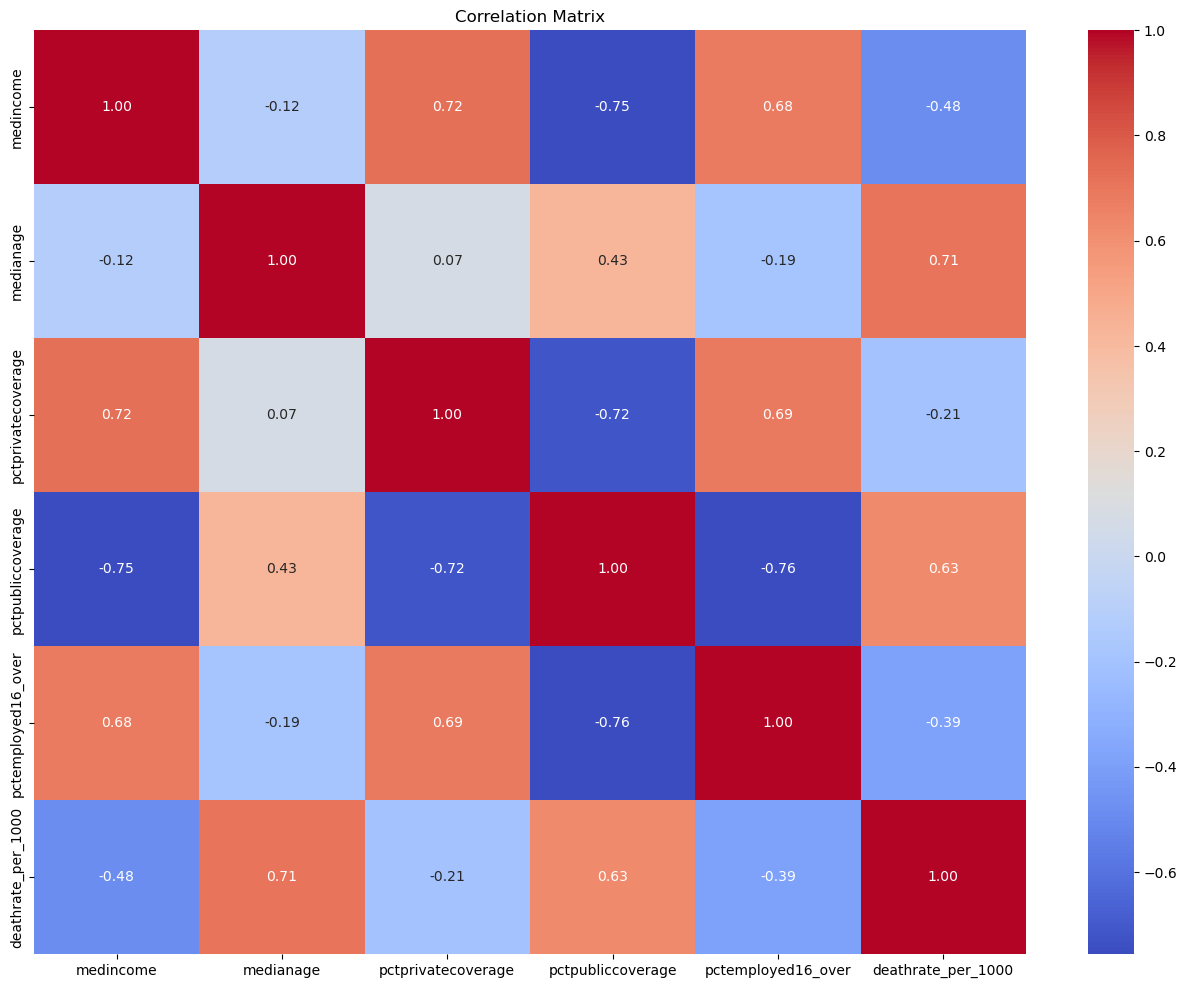

In [55]:
numeric_select=select_data.select_dtypes(include=['float64','int64'])
corr_matrix1 = numeric_select.corr()


# Plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix1,annot=True,fmt=".2f",cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

high positive correlation between age and percent of poeple with public insurance. There is low negative correlation between private insurance and median income. high correlation between income and percent of private coverage.

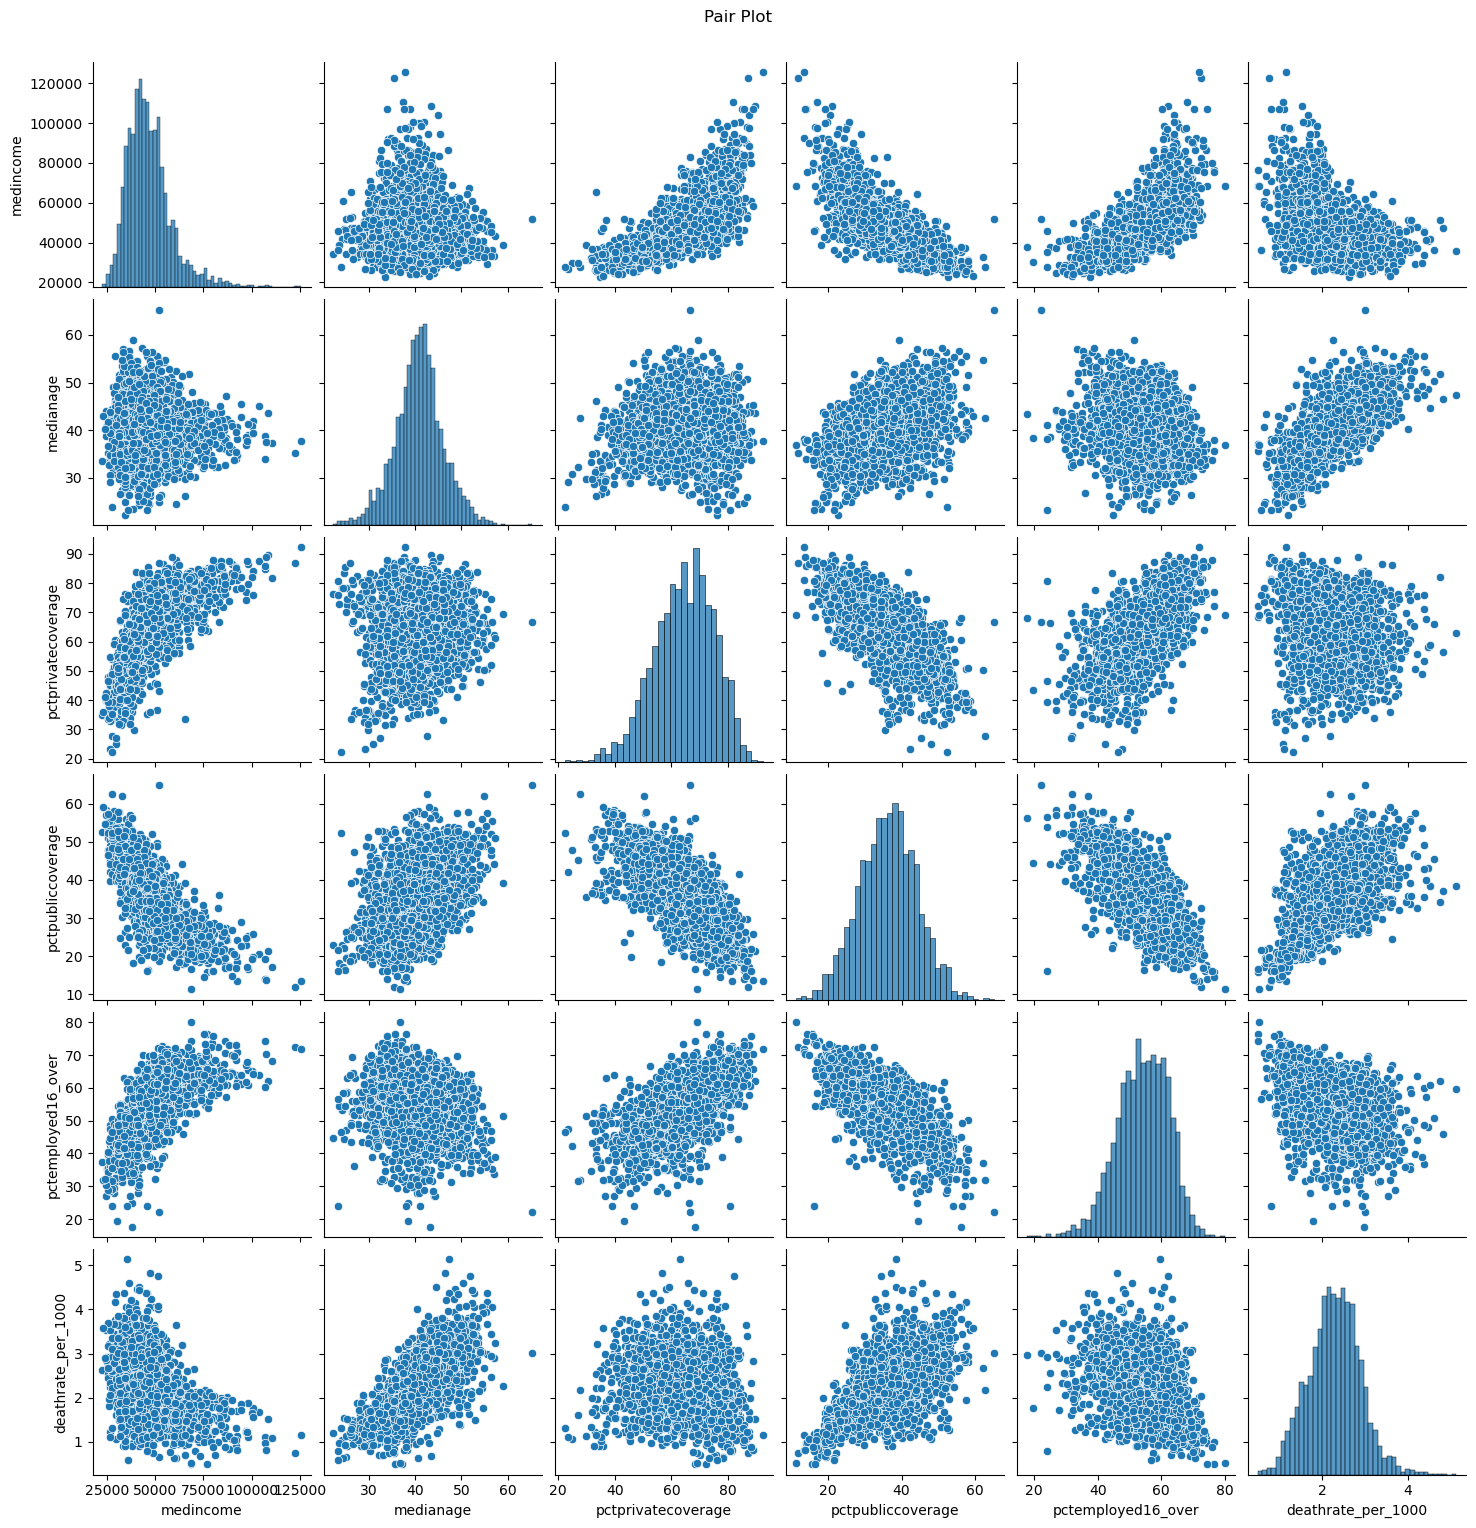

In [56]:
#pair plot

# Create the pair plot
sns.pairplot(numeric_select)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

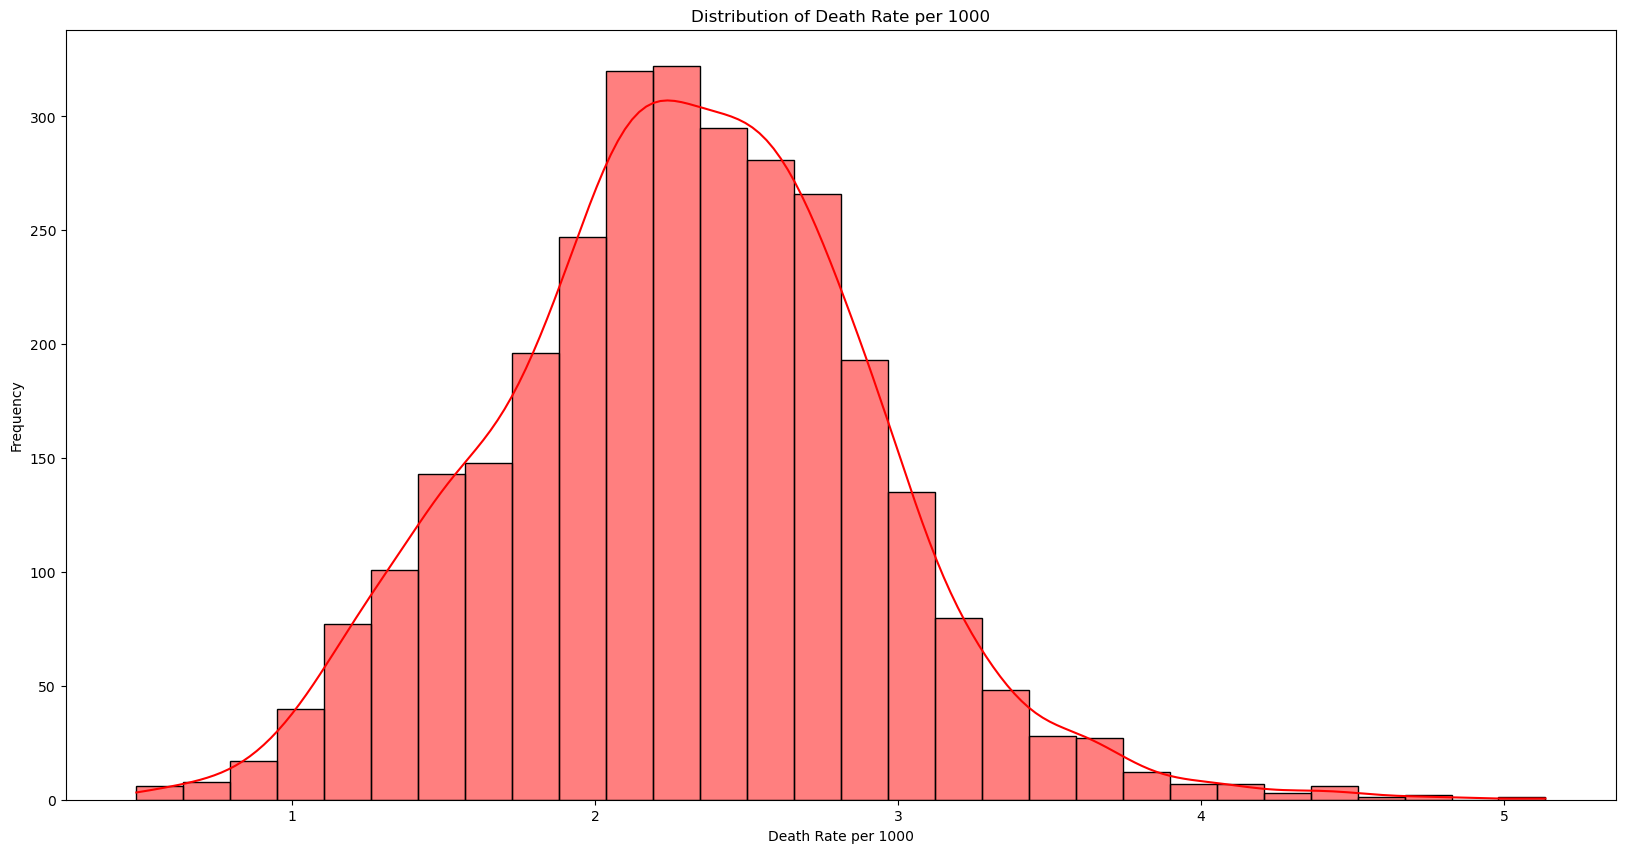

In [57]:
plt.figure(figsize=(20, 10))
sns.histplot(data=select_data, x='deathrate_per_1000', bins=30, kde=True, color='red')
plt.title('Distribution of Death Rate per 1000')
plt.xlabel('Death Rate per 1000')
plt.ylabel('Frequency')
plt.show()

/var/folders/3d/q4w8688x57bb9666k54mhnxc0000gn/T/ipykernel_46591/3882693802.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot([select_data[select_data['clinical_trials'] == 'yes']['deathrate_per_1000'],


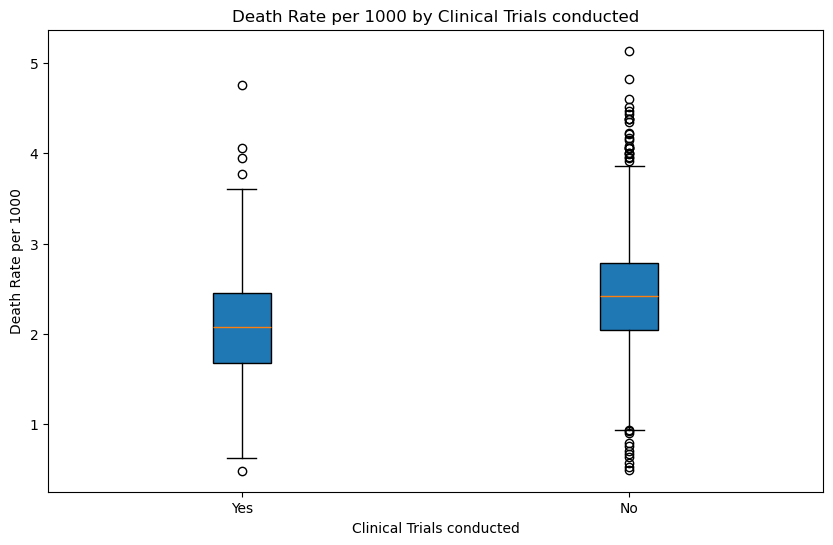

In [58]:
# Create box plot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot([select_data[select_data['clinical_trials'] == 'yes']['deathrate_per_1000'],
                       select_data[select_data['clinical_trials'] == 'no']['deathrate_per_1000']],
                      labels=['Yes', 'No'], patch_artist=True)

# Customize the plot
plt.title('Death Rate per 1000 by Clinical Trials conducted')
plt.xlabel('Clinical Trials conducted')
plt.ylabel('Death Rate per 1000')

# Show the plot
plt.show()

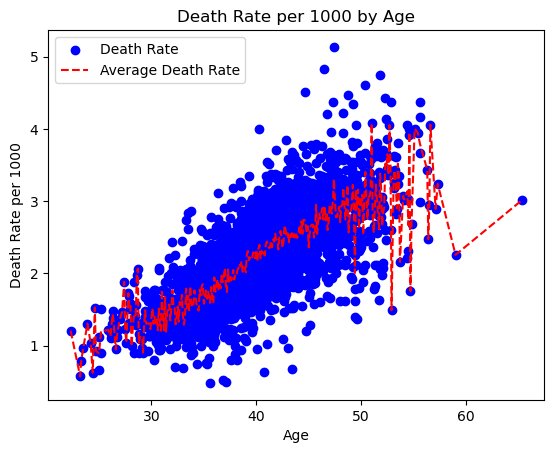

In [59]:
age_groups = select_data.groupby('medianage')['deathrate_per_1000'].mean()

# Scatter plot
plt.scatter(select_data['medianage'], select_data['deathrate_per_1000'], color='blue', label='Death Rate')

# Line for average incidence rate
plt.plot(age_groups.index, age_groups.values, color='red', linestyle='--', label='Average Death Rate')

plt.title('Death Rate per 1000 by Age')
plt.xlabel('Age')
plt.ylabel('Death Rate per 1000')
plt.legend()

plt.show()

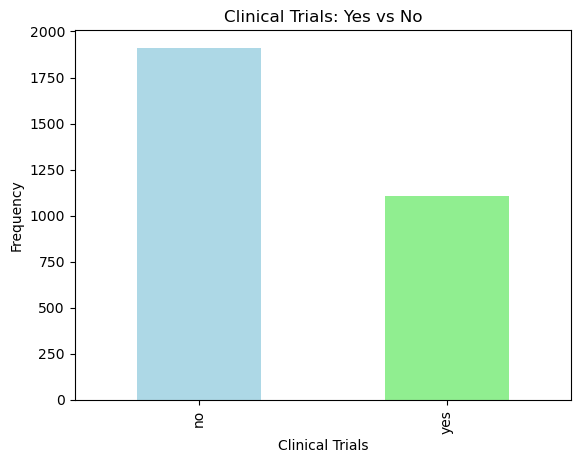

In [60]:
trial_counts = select_data['clinical_trials'].value_counts()

# Create a bar plot
trial_counts.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Clinical Trials: Yes vs No')
plt.xlabel('Clinical Trials')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=trial_counts.index)

# Show the plot
plt.show()

In [158]:
trial_counts

clinical_trials
no     1911
yes    1106
Name: count, dtype: int64

In [61]:
predictors = ['medincome', 'medianage', 'pctprivatecoverage',
       'pctpubliccoverage', 'pctemployed16_over']

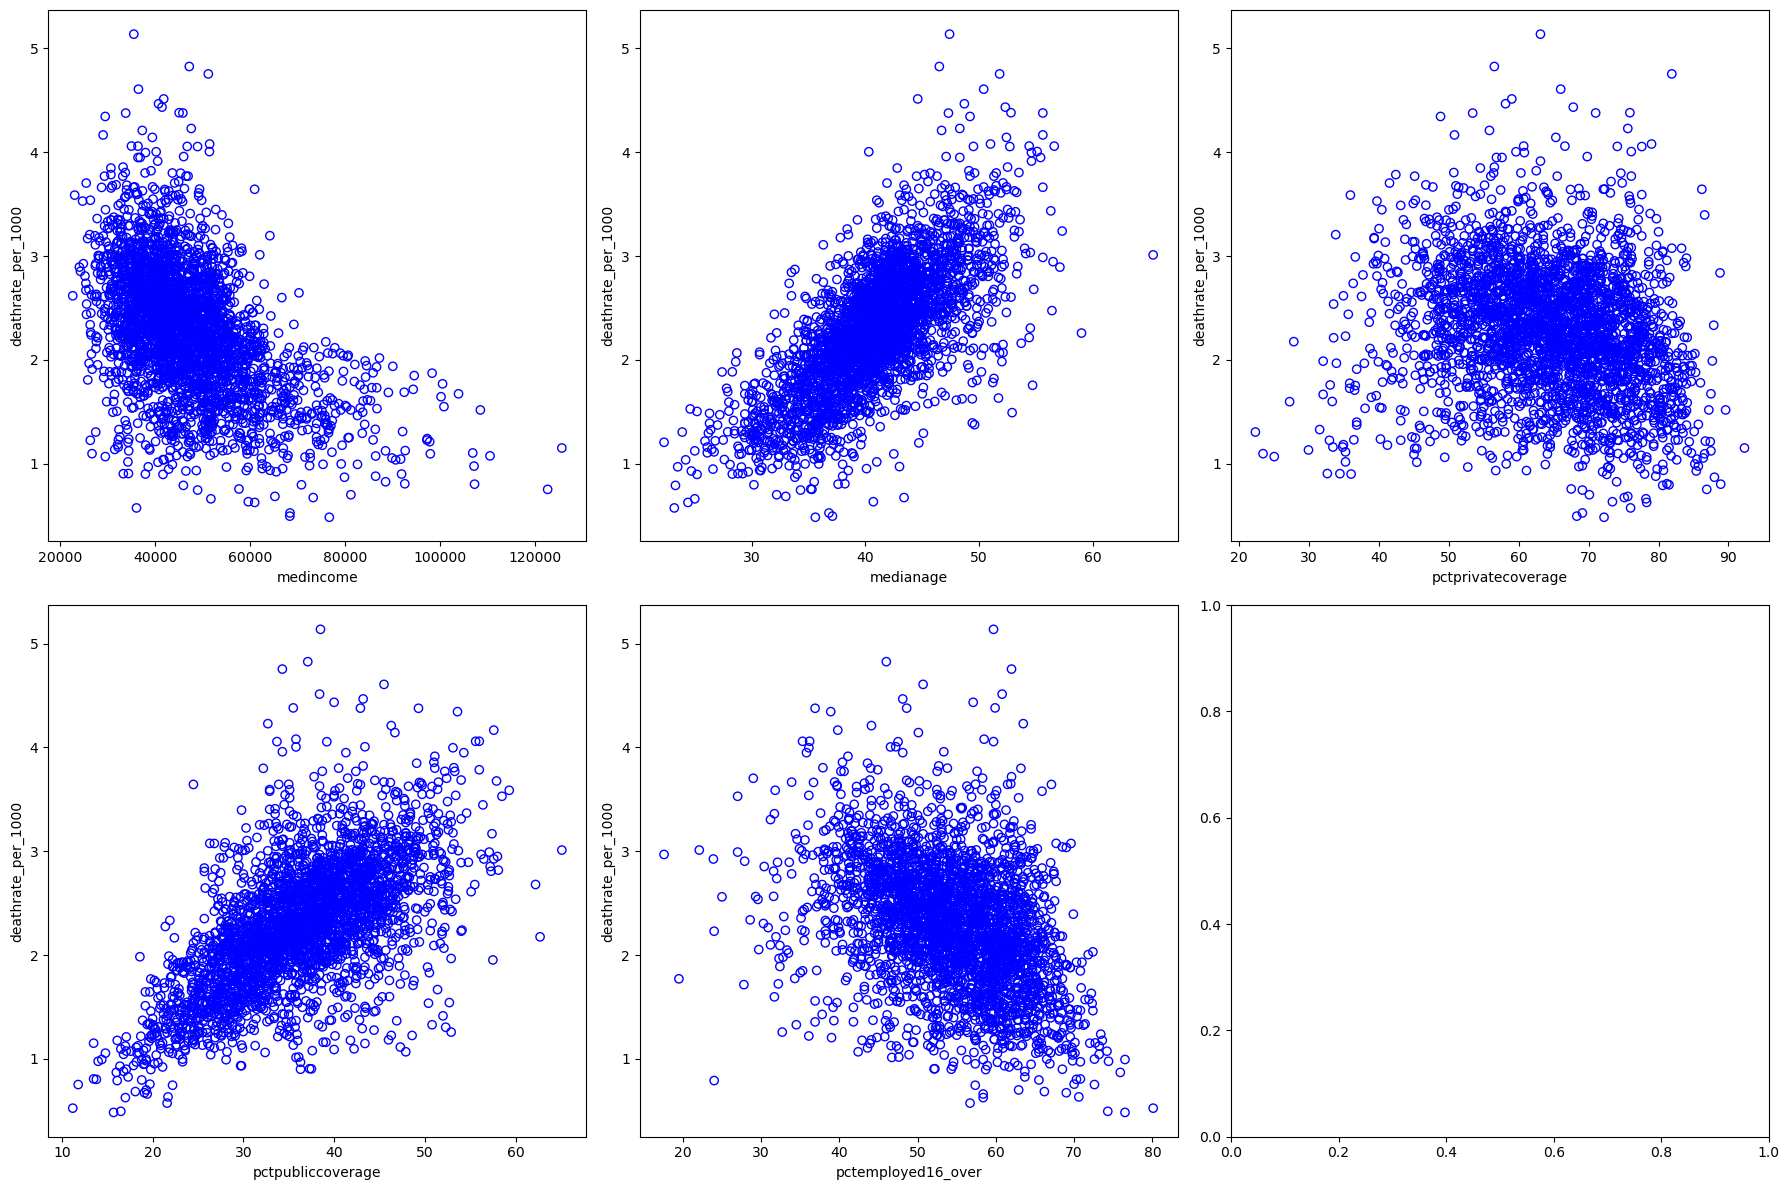

In [63]:
# Plotting data to understand relationships
fig, axarr = plt.subplots(2,3,figsize = (18,12))
for el, predictor in enumerate(predictors):
    index = np.unravel_index(el,(2,3))
    axarr[index[0], index[1]].scatter(select_data[predictor],select_data['deathrate_per_1000'], facecolor='none', edgecolor='b');
    axarr[index[0], index[1]].set_xlabel(predictor);
    axarr[index[0], index[1]].set_ylabel('deathrate_per_1000');
    plt.tight_layout()
plt.suptitle('');

In [102]:
select_data_dummies = pd.get_dummies(select_data).astype('float64')
select_data_dummies = select_data_dummies.drop(['clinical_trials_no'], axis = 1)
select_data_dummies.rename(columns = {'clinical_trials_yes':'clinical_trials'}, inplace=True)


In [103]:
select_data_dummies.head()

medincome  medianage  pctprivatecoverage  pctpubliccoverage  \
0    61898.0       39.3                75.1               32.9   
1    48127.0       33.0                70.2               31.1   
2    49348.0       45.0                63.7               42.1   
3    44243.0       42.8                58.4               45.3   
4    49955.0       48.3                61.6               44.0   

   pctemployed16_over  deathrate_per_1000  clinical_trials  
0                51.9            1.802938              1.0  
1                55.9            1.617786              1.0  
2                45.9            2.378008              1.0  
3                48.3            2.662028              1.0  
4                48.2            2.519136              0.0

In [104]:

# Define the response variable
y = select_data_dummies['deathrate_per_1000']

# Define the predictor variables
X = select_data_dummies[['medincome', 'clinical_trials', 'medianage', 'pctprivatecoverage', 'pctpubliccoverage', 'pctemployed16_over']]

# Add a constant to the model (intercept)
#X_const = sm.add_constant(X)

# Fit the linear regression model
#model = sm.OLS(y, X_const).fit()

# Print the summary of the regression
#print(model.summary())

In [105]:
# Define the response variable
y1 = select_data_dummies['deathrate_per_1000']

# Define the predictor variables
X1 = select_data_dummies[['medianage']]

# Add a constant to the model (intercept)
X1 = sm.add_constant(X1)

# Fit the linear regression model
model1 = sm.OLS(y1, X1).fit()

# Print the summary of the regression
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     deathrate_per_1000   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     2992.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:42:03   Log-Likelihood:                -1753.4
No. Observations:                3017   AIC:                             3511.
Df Residuals:                    3015   BIC:                             3523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0992      0.062    -17.613      0.0

In [106]:
# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='medianage', y='deathrate_per_1000', data=select_data_dummies, ci=95, line_kws={'color':'red','linewidth':2})
plt.title('Linear Regression of Death Rate per 1000 vs Median Age')
plt.xlabel('Median Age')
plt.ylabel('Death Rate per 1000')
plt.grid(True)
plt.show()

In [107]:
medianage_slope = model1.params[1]

/var/folders/3d/q4w8688x57bb9666k54mhnxc0000gn/T/ipykernel_46591/3208248734.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  medianage_slope = model1.params[1]


In [108]:
# Calculate the standard error of the slope
n = len(X1)  # Number of observations
k = X1.shape[1]  # Number of predictors
y_pred = model1.predict(X1)
residuals = y1 - y_pred
residual_sum_of_squares = np.sum(residuals**2)
variance = residual_sum_of_squares / (n - k - 1)
X_medianage = X1['medianage']
std_error = np.sqrt(variance / np.sum((X_medianage - X_medianage.mean())**2))

# Calculate the t-statistic
t_stat = medianage_slope / std_error

# Calculate the p-value
degrees_of_freedom = n - k - 1
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=degrees_of_freedom))

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The slope is significantly different from zero.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude the slope is significantly different from zero.")

t-statistic: 54.68827877883311
p-value: 0.0
Reject the null hypothesis. The slope is significantly different from zero.


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train.columns

Index(['medincome', 'clinical_trials', 'medianage', 'pctprivatecoverage',
       'pctpubliccoverage', 'pctemployed16_over'],
      dtype='object')

In [111]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:


# 2. Non-Linear (Polynomial) Regression
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)

# 3. Lasso Regression
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)

# 4. Ridge Regression
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5).fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)

# 5. GAM
gam = GAM(s(0) + f(1) + l(2) + s(3) + s(4))
gam.fit(X_train_scaled, y_train)
y_pred_gam = gam.predict(X_test_scaled)
r2_gam = r2_score(y_test, y_pred_gam)

# Print results
print(f"PCA R2: {r2_pca}")
print(f"Polynomial R2: {r2_poly}")
print(f"Lasso R2: {r2_lasso}")
print(f"Ridge R2: {r2_ridge}")
print(f"GAM R2: {r2_gam}")

# Select best model
models = {
    "PCA": r2_pca,
    "Polynomial": r2_poly,
    "Lasso": r2_lasso,
    "Ridge": r2_ridge,
    "GAM": r2_gam
}

best_model = max(models, key=models.get)
print(f"\nBest model: {best_model} with R2 score: {models[best_model]}")

PCA R2: 0.6232500288461774
Polynomial R2: 0.6384964411737839
Lasso R2: 0.6304949581372119
Ridge R2: 0.6308935431118359
GAM R2: 0.6392506866976427

Best model: GAM with R2 score: 0.6392506866976427


In [113]:
X_train

medincome  clinical_trials  medianage  pctprivatecoverage  \
96      52149.0              1.0       41.0                77.1   
1629    53645.0              0.0       41.2                76.8   
2609    44676.0              0.0       45.1                62.3   
1419    64632.0              1.0       37.5                73.4   
2644    34906.0              0.0       40.3                50.5   
...         ...              ...        ...                 ...   
1651    42994.0              1.0       39.4                64.7   
1104    54280.0              1.0       32.2                64.8   
1139    42946.0              1.0       34.2                60.2   
1304    52394.0              0.0       47.8                79.2   
868     46598.0              0.0       45.0                62.1   

      pctpubliccoverage  pctemployed16_over  
96                 30.6           64.600000  
1629               31.8           55.911392  
2609               38.8           48.800000  
1419               30.5           60.800000  
2644               41.3           45.400000  
...                 ...                 ...  
1651               37.8           55.911392  
1104               37.9           62.500000  
1139               38.5           59.700000  
1304               28.2           65.000000  
868                41.0           57.200000  

[2413 rows x 6 columns]

In [114]:
X_train_scaled[0]

array([ 0.43230839,  1.32104692,  0.04430309,  1.20883351, -0.72195326,
        1.26378695])

In [115]:
columns = list(X_train.columns)

In [155]:
# Fitting GAM to selected predictors
gam1 = LinearGAM(s(0, n_splines = 15) + f(1) + s(2, n_splines=15) + s(3, n_splines=15)+ s(4, n_splines=15) + s(5, n_splines=15)).fit(X_train_scaled, y_train)

# Loop through terms and plot partial dependence
fig, axes = plt.subplots(3, 3, figsize=(20, 5), constrained_layout=True)
axes = axes.flatten()
for i, term in enumerate(gam1.terms):
    if term.isintercept:
        continue

    XX = gam1.generate_X_grid(term=i)
    pdep, confi = gam1.partial_dependence(term=i, X=XX, width=0.95)

    # Extract feature name
    feature_name = columns[i]  # Get the feature name associated with this term

    ax = axes[i]  # Select the corresponding subplot
    ax.plot(XX[:, term.feature], pdep)
    ax.plot(XX[:, term.feature], confi, c='r', ls='--')
    ax.set_title(f"{feature_name}")
    ax.legend()

plt.show()

/var/folders/3d/q4w8688x57bb9666k54mhnxc0000gn/T/ipykernel_46591/3827099242.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


In [117]:
y_pred_gam = gam1.predict(X_test_scaled)
r2_gam = r2_score(y_test, y_pred_gam)
print(r2_gam)

0.6399313611772762


In [156]:
# Make predictions on the test set
y_pred_gam = gam1.predict(X_test_scaled)

# Compute MSE
mse_gam = mean_squared_error(y_test, y_pred_gam)

# Compute R-squared
r2_gam = r2_score(y_test, y_pred_gam)

print(f"Mean Squared Error (MSE): {mse_gam:.4f}")
print(f"R-squared (R2): {r2_gam:.4f}")

Mean Squared Error (MSE): 0.1304
R-squared (R2): 0.6433


In [118]:
# Cross-validate to select the optimal number of components
mse_pca = []
for m in range(1, X_train_scaled.shape[1] + 1):
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Linear regression on principal components
    lr_pca = LinearRegression()
    lr_pca.fit(X_train_pca, y_train)
    y_pred_pca = lr_pca.predict(X_test_pca)
    mse_pca.append(mean_squared_error(y_test, y_pred_pca))

# Optimal number of components
optimal_m = np.argmin(mse_pca) + 1
print(f"Optimal number of components: {optimal_m}")
print(f"PCR Test MSE: {mse_pca[optimal_m-1]}")

# Compute R² for PCR with optimal number of components
pca = PCA(n_components=optimal_m)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

r2_pca = r2_score(y_test, y_pred_pca)
print(f"PCR R²: {r2_pca}")

Optimal number of components: 4
PCR Test MSE: 0.13467094255492762
PCR R²: 0.6232500288461774


In [119]:
# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Calculate test error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Test MSE: {mse_lr}")

# Compute R² for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R²: {r2_lr}")

Linear Regression Test MSE: 0.13522705670606003
Linear Regression R²: 0.630078201298925


In [120]:
# Add a constant to the model (intercept)
X_const = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_const).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     deathrate_per_1000   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     921.7
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:42:07   Log-Likelihood:                -799.64
No. Observations:                2413   AIC:                             1613.
Df Residuals:                    2406   BIC:                             1654.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3785      0

In [121]:
# Step 2: Predict on the test set
X_test_const = sm.add_constant(X_test)  # Add constant to test data
y_pred_ols = model.predict(X_test_const)

# Step 3: Compute R^2 on the test set
r2_test = r2_score(y_test, y_pred_ols)
print(f"Statsmodels R^2 on Test Data: {r2_test}")

Statsmodels R^2 on Test Data: 0.6300782012989259


In [129]:
# Ridge regression with cross-validation to choose alpha
ridge = RidgeCV(alphas=np.linspace(.01, 100, 1000),  cv=10)
ridge.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test_scaled)

# Calculate test error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Test MSE: {mse_ridge}")

# Compute R² for Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R²: {r2_ridge}")

Ridge Regression Test MSE: 0.13462298897958497
Ridge Regression R²: 0.6317306651279697


In [130]:
# Lasso regression with cross-validation to choose alpha
lasso = LassoCV(alphas=np.logspace(-6, 6, 100), cv=5, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lasso = lasso.predict(X_test_scaled)

# Number of non-zero coefficients
num_nonzero_coeffs = np.sum(lasso.coef_ != 0)
print(f"Number of non-zero coefficients: {num_nonzero_coeffs}")

# Calculate test error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Test MSE: {mse_lasso}")

# Compute R² for Lasso Regression
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression R²: {r2_lasso}")

Number of non-zero coefficients: 6
Lasso Regression Test MSE: 0.1351731173251134
Lasso Regression R²: 0.6302257557403708


In [145]:
# 2. Non-Linear (Polynomial) Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_test_scaled)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

In [157]:
# Results table
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'PCR', 'Polynomial Regression', 'GAM'],
    'R²': [r2_lr, r2_ridge, r2_lasso, r2_pca, r2_poly, r2_gam],
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_pca[optimal_m-1], mse_poly, mse_gam]
}

results_df = pd.DataFrame(results)
print(results_df)

                   Model        R²       MSE
0      Linear Regression  0.630078  0.135227
1       Ridge Regression  0.631731  0.134623
2       Lasso Regression  0.630226  0.135173
3                    PCR  0.623250  0.134671
4  Polynomial Regression  0.642706  0.130611
5                    GAM  0.643286  0.130399
